# Project 1- Case Studies:

## Bike Sharing

By Preethi Susan Abraham and Alvin Varghese

In [1]:
#Loading the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# Day Dataset

In [2]:
#Reading the dataset 'day'
day=pd.read_csv("C:/Users/Preethi Abraham/Desktop/Brandeis Studies/Big Data 2/datasets/notebooks/Assignment 2/day.csv")

In [3]:
#Observing the first few rows of day dataset
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
#Dropping the first column 'instant'
day.drop("instant", axis=1, inplace=True)

In [5]:
#Viewing the dataset again
day.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1        0        6           0           2   
1  2011-01-02       1   0     1        0        0           0           2   
2  2011-01-03       1   0     1        0        1           1           1   
3  2011-01-04       1   0     1        0        2           1           1   
4  2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [7]:
#Splitting the data into x and y variables
day_x=day.iloc[:,1:12] #Excluding the dteday column
day_y1=day["casual"]
day_y2=day["registered"]
day_y3=day["cnt"]

In [8]:
day_x.head()

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  
0  0.363625  0.805833   0.160446  
1  0.353739  0.696087   0.248539  
2  0.189405  0.437273   0.248309  
3  0.212122  0.590435   0.160296  
4  0.229270  0.436957   0.186900

### Exploratory Analysis

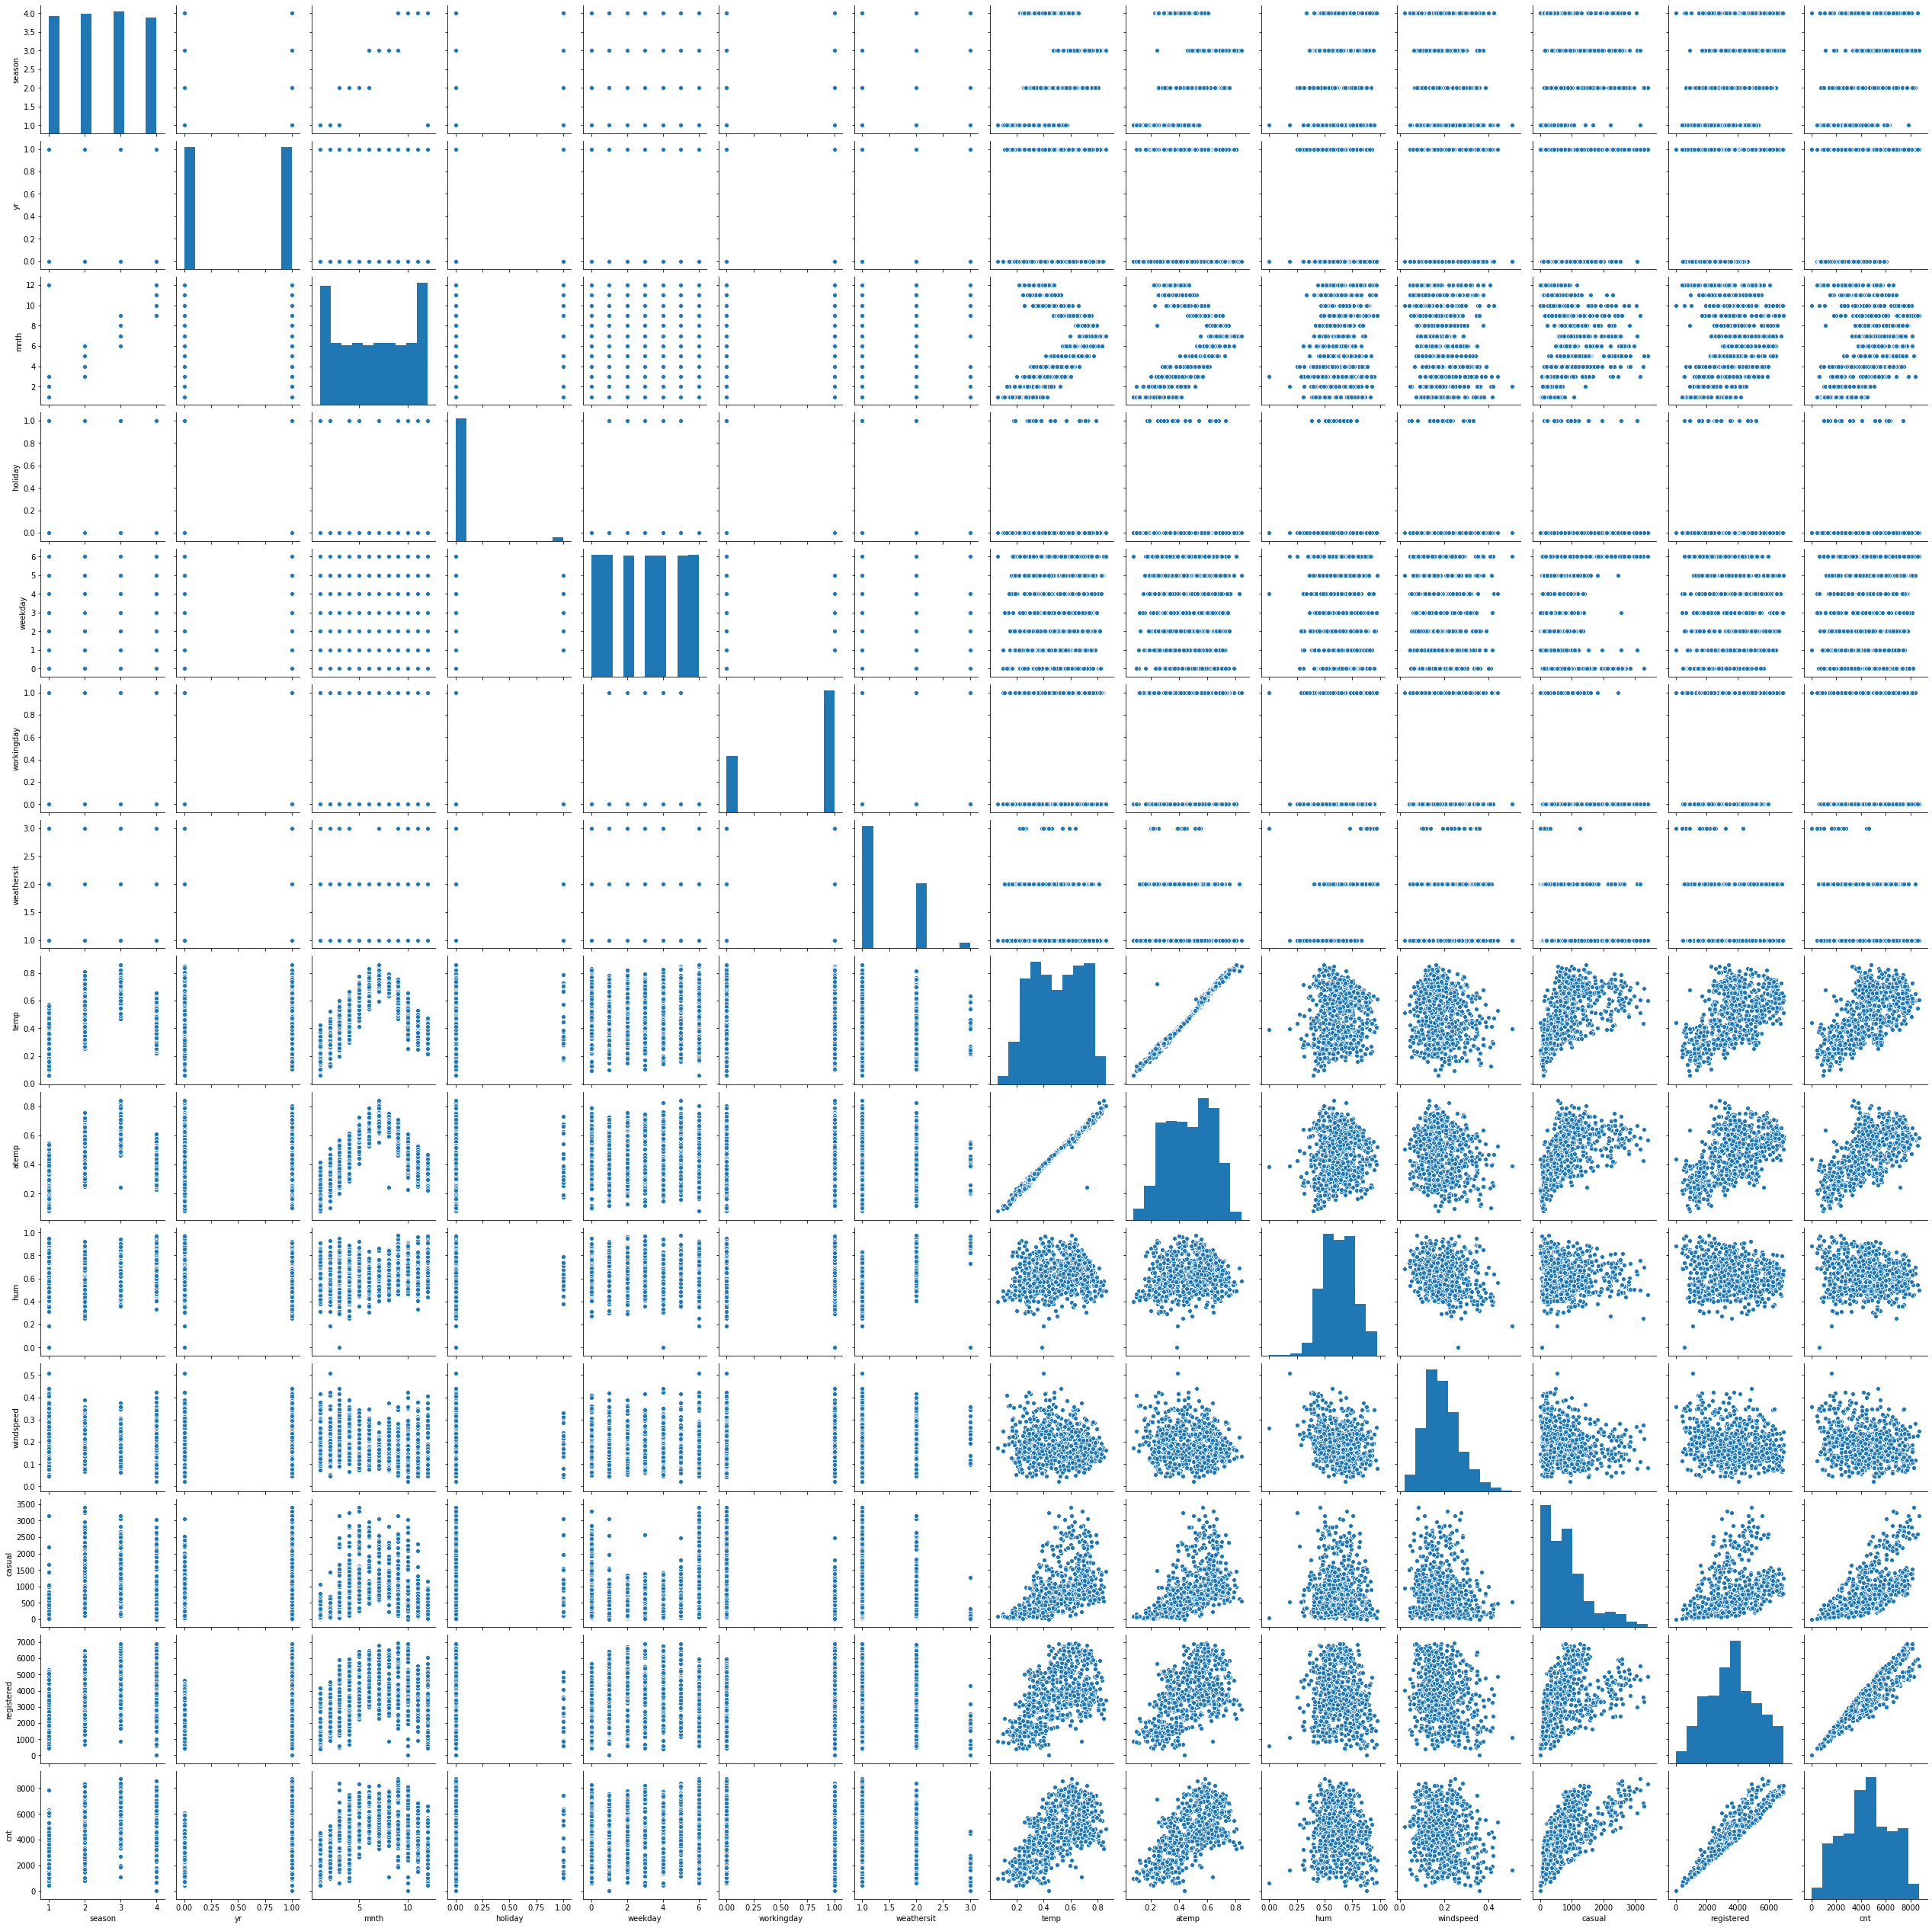

In [9]:
sns.pairplot(day)

Text(0.5, 1.0, 'registered')

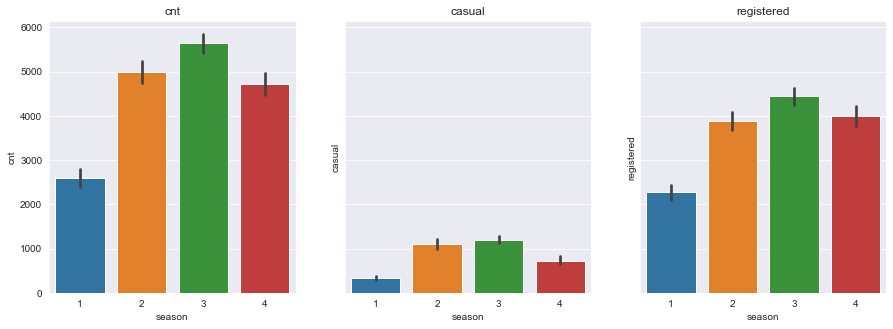

In [10]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot( ax=axes[0], data=day, x='season', y='cnt')
axes[0].set_title('cnt')
sns.barplot( ax=axes[1], data=day, x='season', y='casual')
axes[1].set_title('casual')
sns.barplot( ax=axes[2], data=day, x='season', y='registered')
axes[2].set_title('registered')

#Users seem to prefer the bike sharing service the most during season 3(summer)

Text(0.5, 1.0, 'registered')

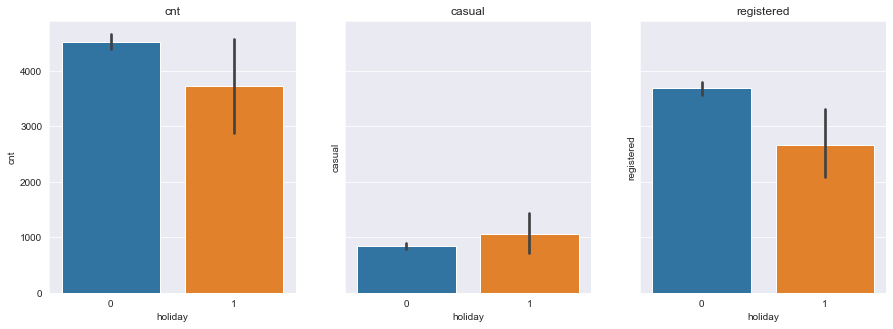

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], data=day, x='holiday', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1], data=day, x='holiday', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2], data=day, x='holiday', y='registered')
axes[2].set_title('registered')

#For registered users, the bike sharing service is preffered the most on days when it is not a holiday
#Whereas for casual users, the bike sharing service is preffered the most on days when it is a holiday

Text(0.5, 1.0, 'registered')

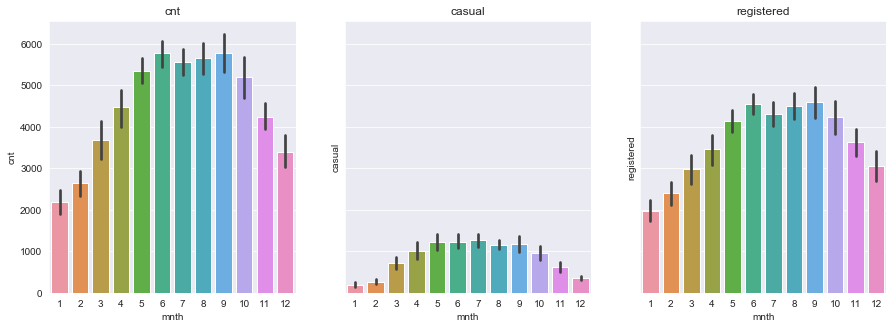

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=day, x='mnth', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=day, x='mnth', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=day, x='mnth', y='registered')
axes[2].set_title('registered')

#June and september are the most preffered months when users utilize the bike sharing service

Text(0.5, 1.0, 'registered')

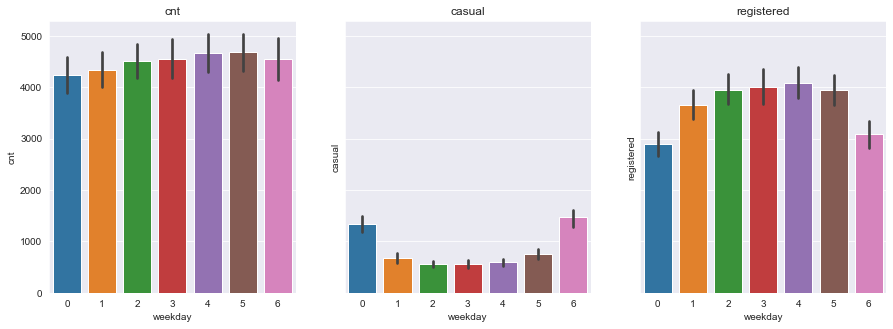

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=day, x='weekday', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=day, x='weekday', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=day, x='weekday', y='registered')
axes[2].set_title('registered')

#Registered users tend to prefer the service during the weekdays, whereas casual users prefer weekends

Text(0.5, 1.0, 'registered')

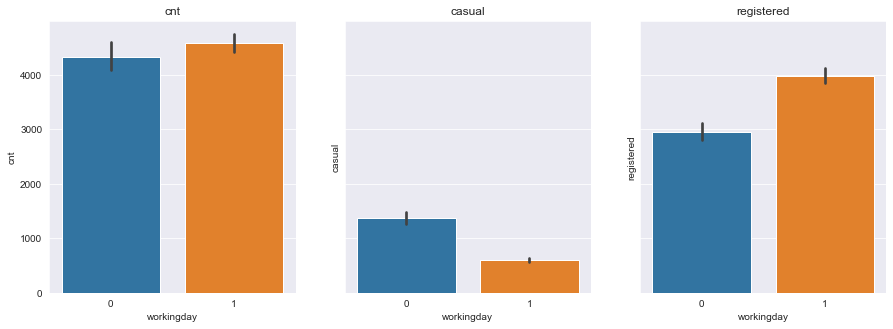

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=day, x='workingday', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=day, x='workingday', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=day, x='workingday', y='registered')
axes[2].set_title('registered')

#Registered users use the service more during working days
#Casual users use the service more during non-working days

Text(0.5, 1.0, 'registered')

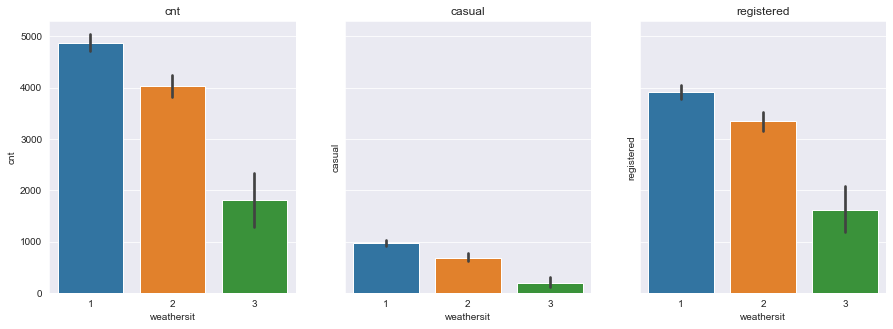

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=day, x='weathersit', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=day, x='weathersit', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=day, x='weathersit', y='registered')
axes[2].set_title('registered')

#All users prefer to use the bike sharing service the most when the weather is 1 (Clear, Few clouds, Partly cloudy)

Text(0.5, 1.0, 'registered')

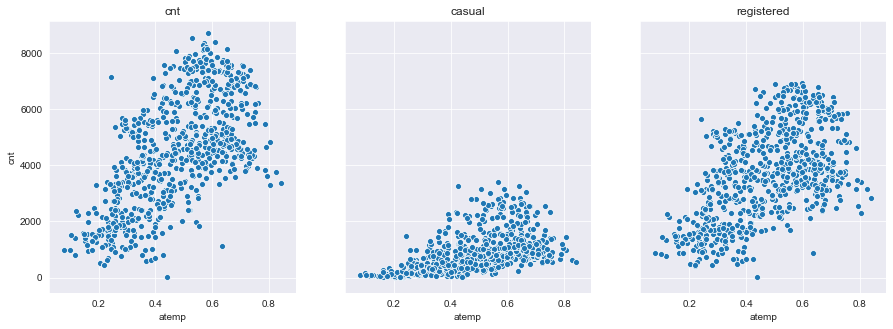

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],data=day, x='atemp', y='cnt')
axes[0].set_title('cnt')
sns.scatterplot(ax=axes[1],data=day, x='atemp', y='casual')
axes[1].set_title('casual')
sns.scatterplot(ax=axes[2],data=day, x='atemp', y='registered')
axes[2].set_title('registered')

Text(0.5, 1.0, 'registered')

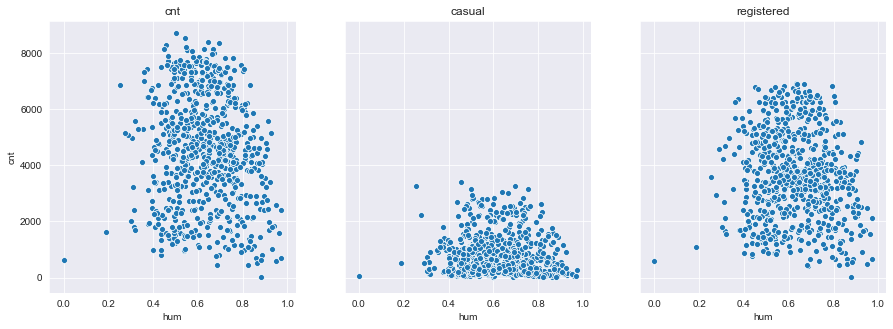

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],data=day, x='hum', y='cnt')
axes[0].set_title('cnt')
sns.scatterplot(ax=axes[1],data=day, x='hum', y='casual')
axes[1].set_title('casual')
sns.scatterplot(ax=axes[2],data=day, x='hum', y='registered')
axes[2].set_title('registered')

Text(0.5, 1.0, 'registered')

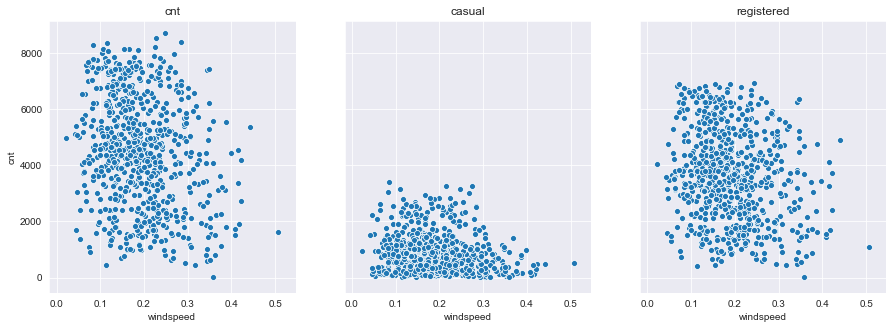

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],data=day, x='windspeed', y='cnt')
axes[0].set_title('cnt')
sns.scatterplot(ax=axes[1],data=day, x='windspeed', y='casual')
axes[1].set_title('casual')
sns.scatterplot(ax=axes[2],data=day, x='windspeed', y='registered')
axes[2].set_title('registered')

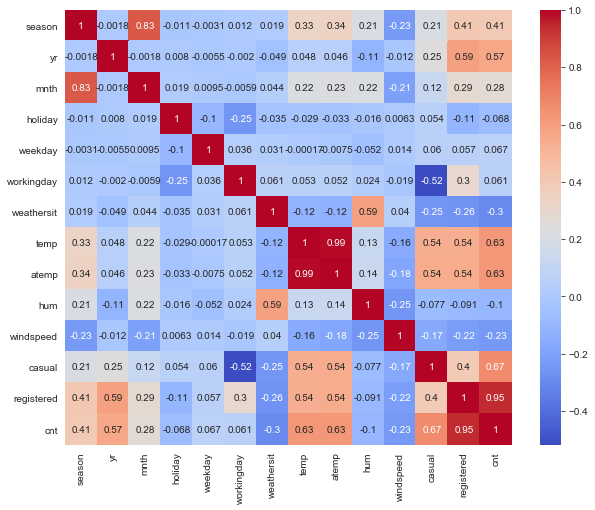

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(day.corr(), cmap='coolwarm', annot=True)

#Season and month have high correlation(0.83)

## For target = casual

In [20]:
#Splitting the data into training and testing
X_train, X_test, y1_train, y1_test = train_test_split(day_x, day_y1, test_size=0.4, random_state=9) #60% training, 40% testing

In [21]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train =pd.DataFrame(X_train, columns=["season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"])

In [23]:
#Initializing the model
lr = LinearRegression()
lr.fit(X_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#Printing the neccessary values
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': day_x.columns, 'coefficient': lr.coef_}))
print("\n*********************************************************\n")
regressionSummary(y1_train, lr.predict(X_train))
y1_pred = lr.predict(X_train)
print("*********************************************************\n")
print('adjusted r2 : ', adjusted_r2_score(y1_train, y1_pred, lr))
print('AIC : ', AIC_score(y1_train, y1_pred, lr))
print('BIC : ', BIC_score(y1_train, y1_pred, lr))


#The equation is as follows:
#casual=799.48+70.98*season+138.49*yr-37.97*mnth-45.52*holiday+48.22*weekday--348.37*workingday--68.83*weathersit+259.10*temp+93.01*atemp-62.21*hum-69.09*windspeed

# The adjusted R squared= 0.67 which is somewhat moderate
#This means that approx 67% of the variability of the dependent variable(casual) is explained by the dependent variables in the model

intercept  799.4885844748859
     Predictor  coefficient
0       season    70.985854
1           yr   138.498191
2         mnth   -37.974082
3      holiday   -45.524928
4      weekday    48.223139
5   workingday  -348.370885
6   weathersit   -68.838092
7         temp   259.109881
8        atemp    93.015536
9          hum   -62.213673
10   windspeed   -69.092520

*********************************************************


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 366.3514
            Mean Absolute Error (MAE) : 262.8049
          Mean Percentage Error (MPE) : -22.2796
Mean Absolute Percentage Error (MAPE) : 101.2786
*********************************************************

adjusted r2 :  0.6746469034968845
AIC :  6440.537619075856
BIC :  6493.60646491075


In [25]:
# Use predict() to make predictions on a new set
y1_test_pred = lr.predict(X_test)

result = pd.DataFrame({'Predicted': y1_test_pred, 'Actual': y1_test,
                       'Residual': y1_test - y1_test_pred})
print(result.head(20))

regressionSummary(y1_test, y1_test_pred)

       Predicted  Actual     Residual
730   -39.816790     439   478.816790
99    864.325427    1188   323.674573
311   420.034668     376   -44.034668
603  1512.257428    1483   -29.257428
503  1039.083050    1521   481.916950
89   -317.983987     179   496.983987
132   345.641049     692   346.358951
478    90.716236     195   104.283764
124   424.219231     614   189.780769
589  1962.207140    2182   219.792860
394   325.361208     126  -199.361208
106  1072.152843    1558   485.847157
97    -19.491267     172   191.491267
323  1025.957931     787  -238.957931
512  1760.476172    3283  1522.523828
721   884.124163     205  -679.124163
703   717.688035     551  -166.688035
316  1119.099143    1004  -115.099143
258   419.572441     742   322.427559
329  1234.000519    1249    14.999481

Regression statistics

                      Mean Error (ME) : 79.6516
       Root Mean Squared Error (RMSE) : 414.2045
            Mean Absolute Error (MAE) : 295.8512
          Mean Percentage Error 

In [26]:
#Performing regularization techniques like Lasso and Ridge Regression

print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(X_train, y1_train)
regressionSummary(y1_test, lasso.predict(X_test))
print("\n********************************************************")

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(X_train, y1_train)
regressionSummary(y1_test, lasso_cv.predict(X_test))
print("\n********************************************************")

print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(X_train, y1_train)
regressionSummary(y1_test, ridge.predict(X_test))
print("\n********************************************************")

print('\n\nBayesianRidge')
bayesianRidge = BayesianRidge(normalize=True)
bayesianRidge.fit(X_train, y1_train)
regressionSummary(y1_test, bayesianRidge.predict(X_test))
print("\n********************************************************")

print('\n\nLinear Regression')
linearRegression = LinearRegression(normalize=True).fit(X_train, y1_train)
regressionSummary(y1_test, linearRegression.predict(X_test))


#The RMSE value is the lowest for linear regression. So this is the best model in comparison to the others



Lasso

Regression statistics

                      Mean Error (ME) : 87.1225
       Root Mean Squared Error (RMSE) : 425.1395
            Mean Absolute Error (MAE) : 293.4699
          Mean Percentage Error (MPE) : 6.5715
Mean Absolute Percentage Error (MAPE) : 67.6996

********************************************************


Lasso Cross-Validation

Regression statistics

                      Mean Error (ME) : 79.9700
       Root Mean Squared Error (RMSE) : 414.4558
            Mean Absolute Error (MAE) : 295.8192
          Mean Percentage Error (MPE) : 18.5190
Mean Absolute Percentage Error (MAPE) : 78.0759

********************************************************


Ridge

Regression statistics

                      Mean Error (ME) : 101.5667
       Root Mean Squared Error (RMSE) : 514.6422
            Mean Absolute Error (MAE) : 343.7654
          Mean Percentage Error (MPE) : -50.3957
Mean Absolute Percentage Error (MAPE) : 74.1668

*******************************************

In [27]:
print("For target= count\n")

pd.DataFrame({'features': X_train.columns, 
              'linear regression': linearRegression.coef_, 
              'lassoCV': lasso_cv.coef_, 
              'ridge': ridge.coef_, 
              'bayesianRidge': bayesianRidge.coef_})


#Why isn't anything coming to zero in Lasso?? 

#Here, we have obtained the coefficients for different regression techniques like linear regression,lassoCV,ridge and bayesianRidge

For target= count



features  linear regression     lassoCV       ridge  bayesianRidge
0       season          70.985854   67.745280   30.198613      67.852307
1           yr         138.498191  137.919607   71.046932     136.775815
2         mnth         -37.974082  -34.810849   -0.784078     -35.035375
3      holiday         -45.524928  -44.687390    3.845694     -43.235204
4      weekday          48.223139   47.632192   23.467761      47.713615
5   workingday        -348.370885 -347.461456 -162.699850    -342.465098
6   weathersit         -68.838092  -68.656335  -57.856029     -68.868223
7         temp         259.109881  260.462199  117.584437     211.342257
8        atemp          93.015536   91.536714  115.555154     138.685985
9          hum         -62.213673  -61.852000  -40.306073     -62.252903
10   windspeed         -69.092520  -68.388968  -37.900323     -67.000560

## For target = registered

In [28]:
X_train, X_test, y2_train, y2_test = train_test_split(day_x, day_y2, test_size=0.4, random_state=9) #60% training, 40% testing

In [29]:
lr = LinearRegression()
lr.fit(X_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': day_x.columns, 'coefficient': lr.coef_}))
print("\n*********************************************************\n")
regressionSummary(y2_train, lr.predict(X_train))
y2_pred = lr.predict(X_train)
print("*********************************************************\n")
print('adjusted r2 : ', adjusted_r2_score(y2_train, y2_pred, lr))
print('AIC : ', AIC_score(y2_train, y2_pred, lr))
print('BIC : ', BIC_score(y2_train, y2_pred, lr))

#The adjusted R squared = 0.80, which is very good
#This means that approx 80% of the variability of the dependent variable(registered) is explained by the dependent variables in the model

intercept  1131.6180167713346
     Predictor  coefficient
0       season   456.872191
1           yr  1738.926529
2         mnth   -27.640497
3      holiday  -365.369588
4      weekday    38.189030
5   workingday   958.219318
6   weathersit  -584.275985
7         temp  1589.201686
8        atemp  1657.770878
9          hum  -701.667968
10   windspeed -2166.939823

*********************************************************


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 686.3317
            Mean Absolute Error (MAE) : 512.9815
          Mean Percentage Error (MPE) : -47.4734
Mean Absolute Percentage Error (MAPE) : 61.4889
*********************************************************

adjusted r2 :  0.8037240763584884
AIC :  6990.462472422436
BIC :  7043.53131825733


In [31]:
y2_test_pred = lr.predict(X_test)

result = pd.DataFrame({'Predicted': y2_test_pred, 'Actual': y2_test,
                       'Residual': y2_test - y2_test_pred})
print(result.head(20))

regressionSummary(y2_test, y2_test_pred)

       Predicted  Actual     Residual
730  2796.324342    2290  -506.324342
99   1232.024989    1707   474.975011
311  3781.744887    3829    47.255113
603  3788.372454    3772   -16.372454
503  5357.502209    6118   760.497791
89   1058.033347    1506   447.966653
132  2526.448049    3413   886.551951
478  3316.370068    3019  -297.370068
124  2944.411026    3819   874.588974
589  4980.437688    4362  -618.437688
394  3826.181376    3498  -328.181376
106  1820.956644    2186   365.043356
97   1908.383273    1299  -609.383273
323  2097.243948    2733   635.756052
512  4266.311886    3308  -958.311886
721  2262.167213    1544  -718.167213
703  5458.271470    6055   596.728530
316  2553.041089    2713   159.958911
258  2974.652040    4018  1043.347960
329  2909.012304    1819 -1090.012304

Regression statistics

                      Mean Error (ME) : 72.5751
       Root Mean Squared Error (RMSE) : 651.7864
            Mean Absolute Error (MAE) : 495.3568
          Mean Percentage Error 

In [32]:
#Performing regularization techniques like Lasso and Ridge Regression

print('\n\nLasso')
lasso_2 = Lasso(normalize=True, alpha=1)
lasso_2.fit(X_train, y2_train)
regressionSummary(y2_test, lasso_2.predict(X_test))
print("\n********************************************************")

print('\n\nLasso Cross-Validation')
lasso_cv_2 = LassoCV(normalize=True, cv=100)
lasso_cv_2.fit(X_train, y2_train)
regressionSummary(y2_test, lasso_cv_2.predict(X_test))
print("\n********************************************************")

print('\n\nRidge')
ridge_2 = Ridge(normalize=True, alpha=1)
ridge_2.fit(X_train, y2_train)
regressionSummary(y2_test, ridge_2.predict(X_test))
print("\n********************************************************")

print('\n\nBayesianRidge')
bayesianRidge_2 = BayesianRidge(normalize=True)
bayesianRidge_2.fit(X_train, y2_train)
regressionSummary(y2_test, bayesianRidge_2.predict(X_test))
print("\n********************************************************")

print('\n\nLinear Regression')
linearRegression_2 = LinearRegression(normalize=True).fit(X_train, y2_train)
regressionSummary(y2_test, linearRegression_2.predict(X_test))

#Lasso model seems to be the best because its RMSE is the lowest



Lasso

Regression statistics

                      Mean Error (ME) : 78.8897
       Root Mean Squared Error (RMSE) : 648.4909
            Mean Absolute Error (MAE) : 492.0508
          Mean Percentage Error (MPE) : -2.4633
Mean Absolute Percentage Error (MAPE) : 17.8417

********************************************************


Lasso Cross-Validation

Regression statistics

                      Mean Error (ME) : 72.8684
       Root Mean Squared Error (RMSE) : 651.5098
            Mean Absolute Error (MAE) : 495.1341
          Mean Percentage Error (MPE) : -2.0351
Mean Absolute Percentage Error (MAPE) : 18.2699

********************************************************


Ridge

Regression statistics

                      Mean Error (ME) : 55.4497
       Root Mean Squared Error (RMSE) : 855.3993
            Mean Absolute Error (MAE) : 695.0542
          Mean Percentage Error (MPE) : -12.6381
Mean Absolute Percentage Error (MAPE) : 26.8256

*******************************************

In [33]:
print("For target= registered\n")

pd.DataFrame({'features': X_train.columns, 
              'linear regression': linearRegression_2.coef_, 
              'lassoCV': lasso_cv_2.coef_, 
              'ridge': ridge_2.coef_, 
              'bayesianRidge': bayesianRidge_2.coef_})

#Why isn't anything coming to zero in Lasso?? 

For target= registered



features  linear regression      lassoCV        ridge  bayesianRidge
0       season         456.872191   452.793572   178.386745     445.539998
1           yr        1738.926529  1737.343964   879.661672    1725.711477
2         mnth         -27.640497   -26.324428    23.457175     -24.490732
3      holiday        -365.369588  -361.666528  -280.570758    -365.959022
4      weekday          38.189030    37.768417    19.182533      37.779802
5   workingday         958.219318   956.727605   500.428637     951.316304
6   weathersit        -584.275985  -583.688467  -313.630271    -577.499003
7         temp        1589.201686  1610.085475  1246.215759    1573.906768
8        atemp        1657.770878  1634.050743  1379.484276    1680.865049
9          hum        -701.667968  -697.204369  -720.168018    -720.496464
10   windspeed       -2166.939823 -2155.186610 -1416.665078   -2160.538602

## For target= cnt

In [34]:
X_train, X_test, y3_train, y3_test = train_test_split(day_x, day_y3, test_size=0.4, random_state=9) #60% training, 40% testing

In [35]:
lr = LinearRegression()
lr.fit(X_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': day_x.columns, 'coefficient': lr.coef_}))
print("\n*********************************************************\n")
regressionSummary(y3_train, lr.predict(X_train))
y3_pred = lr.predict(X_train)
print("*********************************************************\n")
print('adjusted r2 : ', adjusted_r2_score(y3_train, y3_pred, lr))
print('AIC : ', AIC_score(y3_train, y3_pred, lr))
print('BIC : ', BIC_score(y3_train, y3_pred, lr))

#The adjusted R squared = 0.78, which is very good
#This means that approx 78% of the variability of the dependent variable(cnt) is explained by the dependent variables in the model

intercept  1819.7898123568439
     Predictor  coefficient
0       season   519.582776
1           yr  2015.948904
2         mnth   -38.460197
3      holiday  -624.176833
4      weekday    62.681064
5   workingday   198.998193
6   weathersit  -707.064765
7         temp  3006.493725
8        atemp  2226.480356
9          hum -1145.397980
10   windspeed -3034.395134

*********************************************************


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 876.5537
            Mean Absolute Error (MAE) : 652.9870
          Mean Percentage Error (MPE) : -46.1092
Mean Absolute Percentage Error (MAPE) : 59.7795
*********************************************************

adjusted r2 :  0.7887948616221291
AIC :  7204.76441682256
BIC :  7257.833262657454


In [37]:
y3_test_pred = lr.predict(X_test)

result = pd.DataFrame({'Predicted': y3_test_pred, 'Actual': y3_test,
                       'Residual': y3_test - y3_test_pred})
print(result.head(20))

regressionSummary(y3_test, y3_test_pred)

       Predicted  Actual     Residual
730  2756.507552    2729   -27.507552
99   2096.350415    2895   798.649585
311  4201.779555    4205     3.220445
603  5300.629882    5255   -45.629882
503  6396.585259    7639  1242.414741
89    740.049360    1685   944.950640
132  2872.089098    4105  1232.910902
478  3407.086304    3214  -193.086304
124  3368.630257    4433  1064.369743
589  6942.644828    6544  -398.644828
394  4151.542584    3624  -527.542584
106  2893.109487    3744   850.890513
97   1888.892006    1471  -417.892006
323  3123.201879    3520   396.798121
512  6026.788058    6591   564.211942
721  3146.291375    1749 -1397.291375
703  6175.959505    6606   430.040495
316  3672.140231    3717    44.859769
258  3394.224482    4760  1365.775518
329  4143.012823    3068 -1075.012823

Regression statistics

                      Mean Error (ME) : 152.2267
       Root Mean Squared Error (RMSE) : 865.1053
            Mean Absolute Error (MAE) : 662.9327
          Mean Percentage Error

In [38]:
#Performing regularization techniques like Lasso and Ridge Regression

print('\n\nLasso')
lasso_3 = Lasso(normalize=True, alpha=1)
lasso_3.fit(X_train, y3_train)
regressionSummary(y3_test, lasso.predict(X_test))
print("\n********************************************************")

print('\n\nLasso Cross-Validation')
lasso_cv_3 = LassoCV(normalize=True, cv=100)
lasso_cv_3.fit(X_train, y3_train)
regressionSummary(y3_test, lasso_cv.predict(X_test))
print("\n********************************************************")

print('\n\nRidge')
ridge_3 = Ridge(normalize=True, alpha=1)
ridge_3.fit(X_train, y3_train)
regressionSummary(y3_test, ridge.predict(X_test))
print("\n********************************************************")

print('\n\nBayesianRidge')
bayesianRidge_3 = BayesianRidge(normalize=True)
bayesianRidge_3.fit(X_train, y3_train)
regressionSummary(y3_test, bayesianRidge.predict(X_test))
print("\n********************************************************")

print('\n\nLinear Regression')
linearRegression_3 = LinearRegression(normalize=True).fit(X_train, y3_train)
regressionSummary(y3_test, linearRegression_3.predict(X_test))


#RMSE value is the lowest for the linear regression model, hence that is the best



Lasso

Regression statistics

                      Mean Error (ME) : 3775.5709
       Root Mean Squared Error (RMSE) : 4203.7099
            Mean Absolute Error (MAE) : 3777.4234
          Mean Percentage Error (MPE) : 77.6422
Mean Absolute Percentage Error (MAPE) : 77.9884

********************************************************


Lasso Cross-Validation

Regression statistics

                      Mean Error (ME) : 3845.7110
       Root Mean Squared Error (RMSE) : 4271.6786
            Mean Absolute Error (MAE) : 3848.4728
          Mean Percentage Error (MPE) : 79.3236
Mean Absolute Percentage Error (MAPE) : 79.8045

********************************************************


Ridge

Regression statistics

                      Mean Error (ME) : 3730.5246
       Root Mean Squared Error (RMSE) : 4172.0587
            Mean Absolute Error (MAE) : 3733.3228
          Mean Percentage Error (MPE) : 75.8965
Mean Absolute Percentage Error (MAPE) : 76.4670

********************************

In [39]:
print("For target= count\n")

pd.DataFrame({'features': X_train.columns, 
              'linear regression': linearRegression_3.coef_, 
              'lassoCV': lasso_cv_3.coef_, 
              'ridge': ridge_3.coef_, 
              'bayesianRidge': bayesianRidge_3.coef_})

For target= count



features  linear regression      lassoCV        ridge  bayesianRidge
0       season         519.582776   514.276833   205.064915     504.249126
1           yr        2015.948904  2013.895161  1021.768871    1997.939333
2         mnth         -38.460197   -36.747602    23.233773     -34.157795
3      holiday        -624.176833  -619.350976  -258.708155    -616.409870
4      weekday          62.681064    62.134849    31.101567      62.040219
5   workingday         198.998193   197.060006   145.849170     199.028505
6   weathersit        -707.064765  -706.298964  -416.829981    -698.939475
7         temp        3006.493725  3030.514662  1889.384927    2781.110192
8        atemp        2226.480356  2199.114647  2086.004005    2477.589299
9          hum       -1145.397980 -1139.628590 -1007.645249   -1168.699360
10   windspeed       -3034.395134 -3018.924922 -1892.502933   -3007.517327

The accuracy values for linear regression are as follows:
1. For target=casual:
    
    accuracy=0.6746469034968845


2. For target=registered:
    
    accuracy=0.8037240763584884


3. For target=cnt (total):
    
    accuray=0.7887948616221291

# Hour Dataset

In [40]:
#Reading the data
hour=pd.read_csv("C:/Users/Preethi Abraham/Desktop/Brandeis Studies/Big Data 2/datasets/notebooks/Assignment 2/hour.csv")

In [41]:
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [42]:
#Dropping the first column 'instant'
hour.drop("instant", axis=1, inplace=True)

In [43]:
hour.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0       3          13   16  
1  0.22  0.2727  0.80        0.0       8          32   40  
2  0.22  0.2727  0.80        0.0       5          27   32  
3  0.24  0.2879  0.75        0.0       3          10   13  
4  0.24  0.2879  0.75        0.0       0           1    1

In [44]:
#Splitting the data into x and y variables
hour_x=hour.iloc[:,1:13] #Excluding the dteday column
hour_y1=hour["casual"]
hour_y2=hour["registered"]
hour_y3=hour["cnt"]

In [45]:
hour_x.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  
0  0.2879  0.81        0.0  
1  0.2727  0.80        0.0  
2  0.2727  0.80        0.0  
3  0.2879  0.75        0.0  
4  0.2879  0.75        0.0

##### Exploratory data analysis

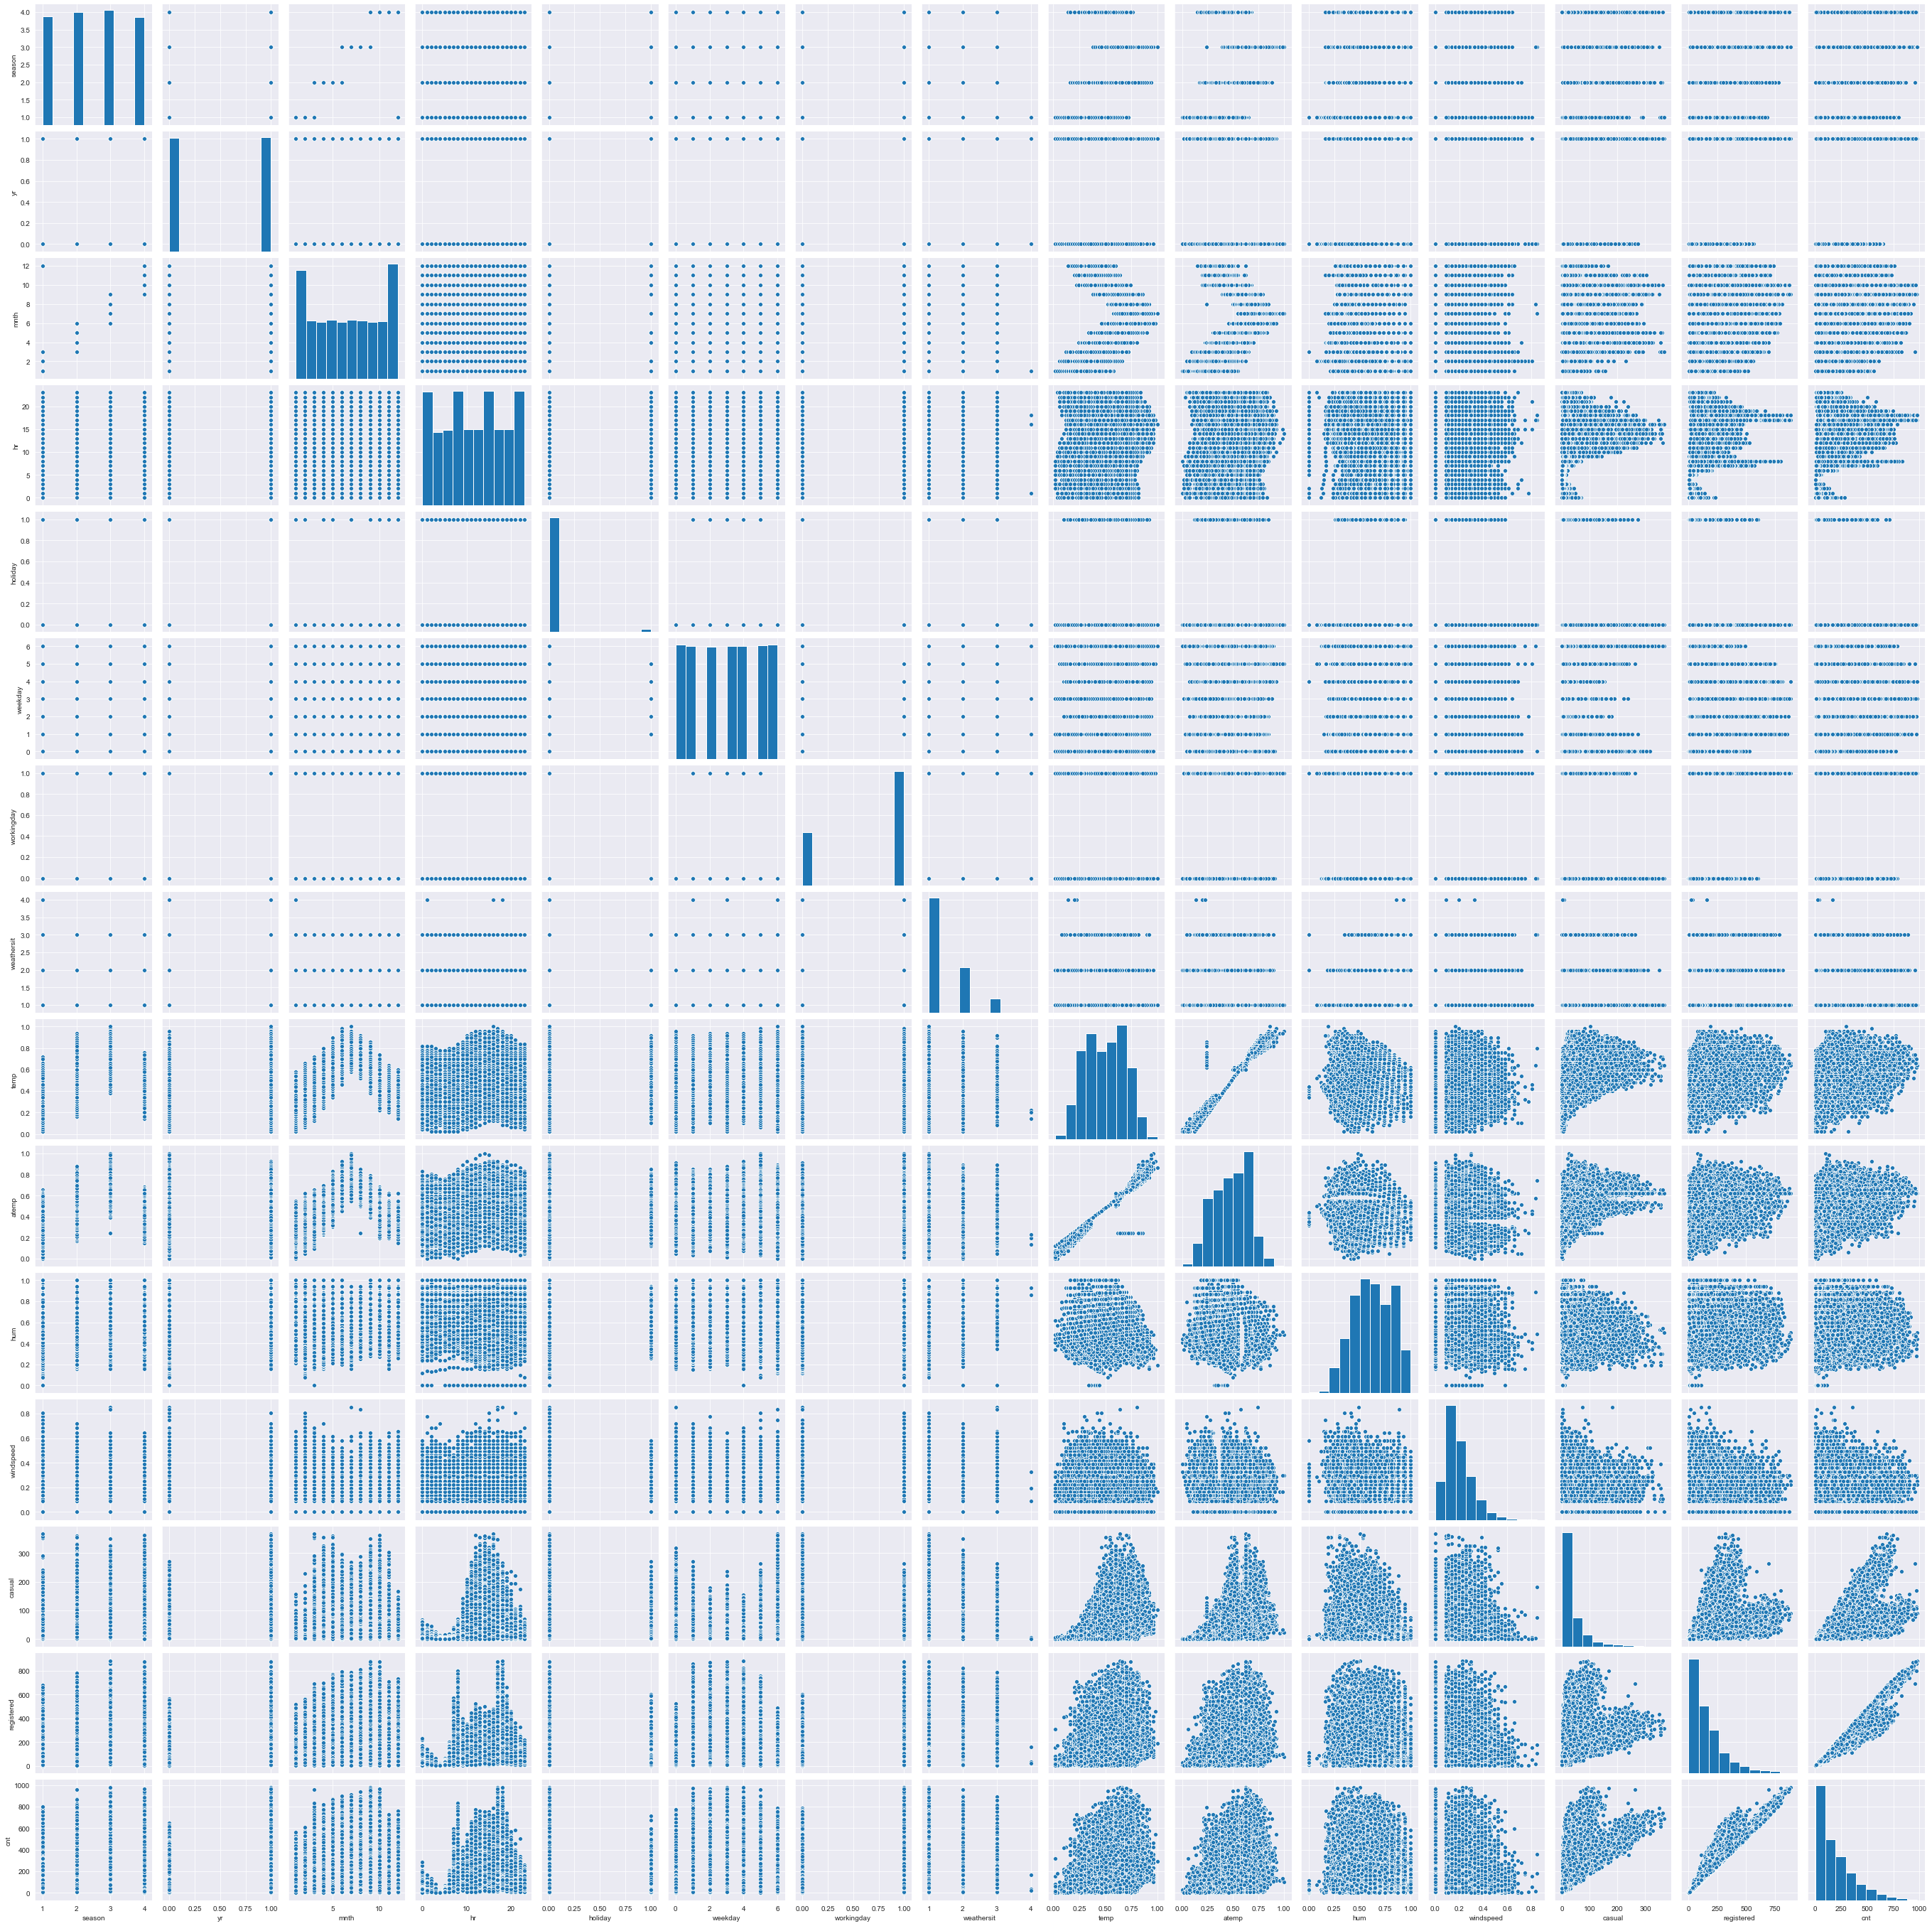

In [46]:
sns.pairplot(hour)

Text(0.5, 1.0, 'registered')

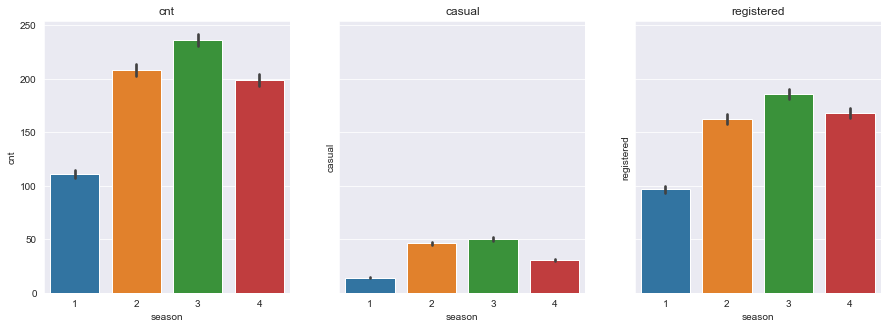

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot( ax=axes[0], data=hour, x='season', y='cnt')
axes[0].set_title('cnt')
sns.barplot( ax=axes[1], data=hour, x='season', y='casual')
axes[1].set_title('casual')
sns.barplot( ax=axes[2], data=hour, x='season', y='registered')
axes[2].set_title('registered')

#Season 3 (summer) seems to be the most popular time when people are using the bike sharing system
#For casual users, seasons 2 and 3 (spring and summer) seems to be a popular time

Text(0.5, 1.0, 'registered')

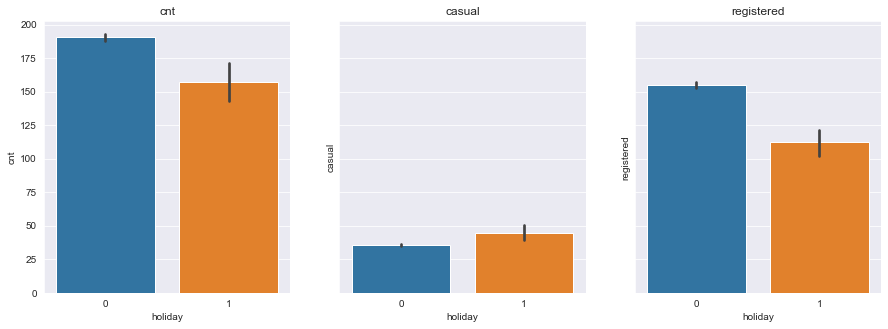

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], data=hour, x='holiday', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1], data=hour, x='holiday', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2], data=hour, x='holiday', y='registered')
axes[2].set_title('registered')

#Registered users tend to use the bike service the most on days when it is not a holiday
#However, casual users tend to use this service more during holidays

Text(0.5, 1.0, 'registered')

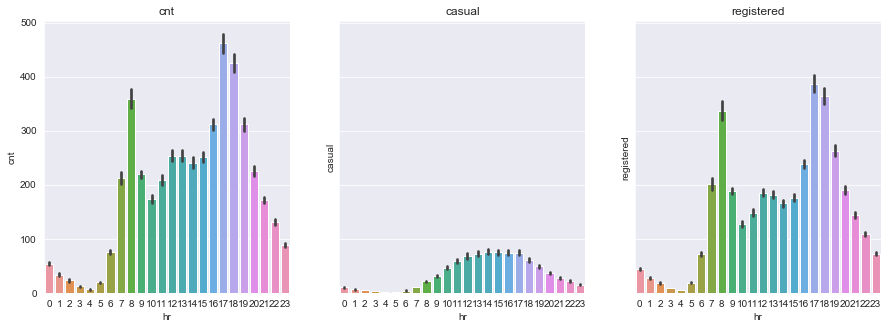

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], data=hour, x='hr', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1], data=hour, x='hr', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2], data=hour, x='hr', y='registered')
axes[2].set_title('registered')

#Morning hours (8 am) and evening (17(5pm) and 18(6pm)) seems to be a popular hour when registered users tend to utilize the bike sharing services
#For casual users, 11 am to 5pm seems to be the popular times

Text(0.5, 1.0, 'registered')

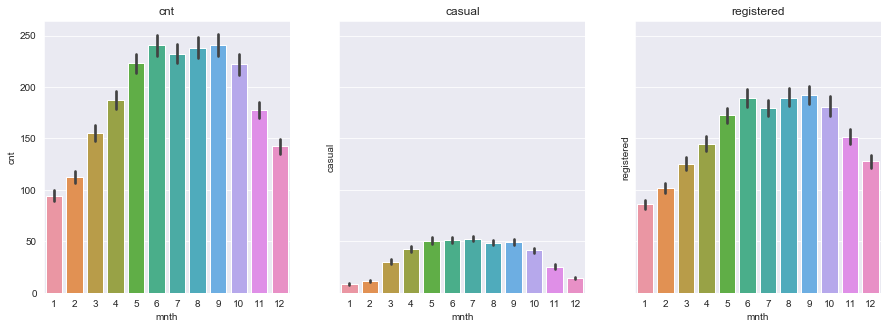

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=hour, x='mnth', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=hour, x='mnth', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=hour, x='mnth', y='registered')
axes[2].set_title('registered')

#June to september seems to be the the most popular  months in which users utilize the bike sharing service
#For casual users, April to september seems popular months

Text(0.5, 1.0, 'registered')

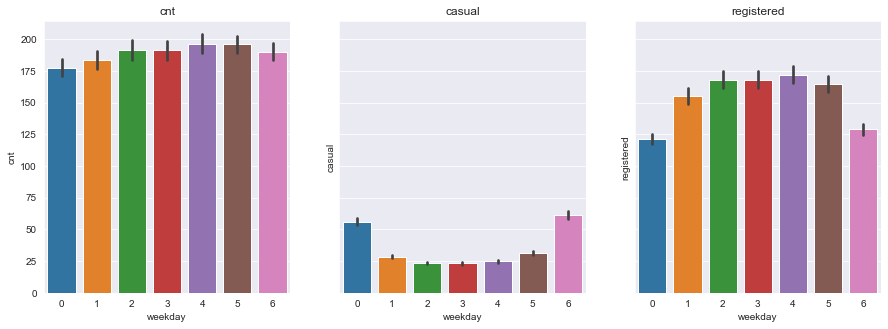

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=hour, x='weekday', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=hour, x='weekday', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=hour, x='weekday', y='registered')
axes[2].set_title('registered')

#For casual users, sunday(0) and saturday(6) are the popular times when they use this service
#For registered users, weekdays(1-5) are the popular times when they use this service

Text(0.5, 1.0, 'registered')

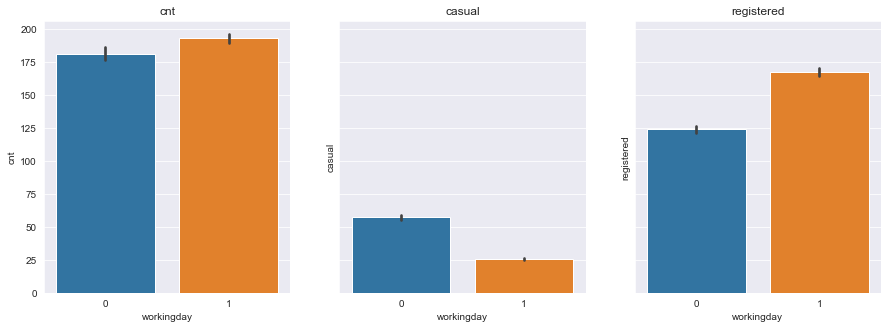

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=hour, x='workingday', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=hour, x='workingday', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=hour, x='workingday', y='registered')
axes[2].set_title('registered')

#Working days seems to be more preffered for registered users who use the bike sharing services
#However, for casual users, weekends are more preffered

Text(0.5, 1.0, 'registered')

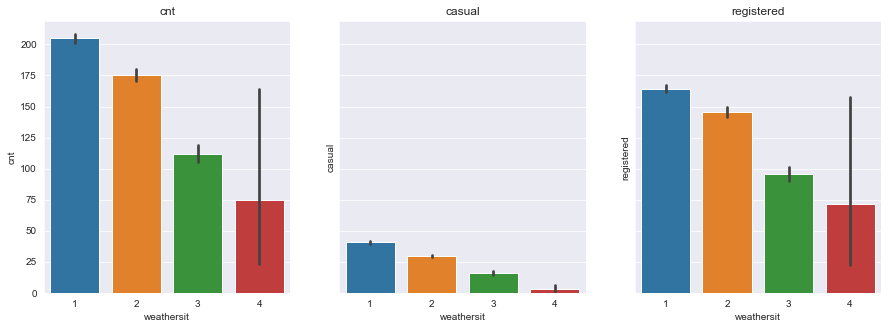

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],data=hour, x='weathersit', y='cnt')
axes[0].set_title('cnt')
sns.barplot(ax=axes[1],data=hour, x='weathersit', y='casual')
axes[1].set_title('casual')
sns.barplot(ax=axes[2],data=hour, x='weathersit', y='registered')
axes[2].set_title('registered')

#For all users, the bike sharing service is preffered the most when the weather is 1 (Clear, Few clouds, Partly cloudy)

Text(0.5, 1.0, 'registered')

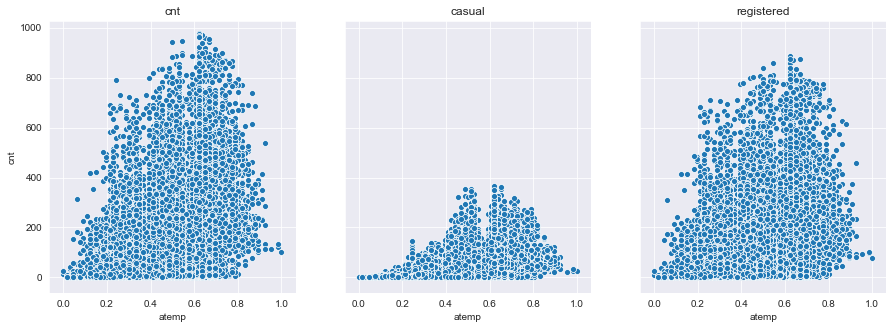

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],data=hour, x='atemp', y='cnt')
axes[0].set_title('cnt')
sns.scatterplot(ax=axes[1],data=hour, x='atemp', y='casual')
axes[1].set_title('casual')
sns.scatterplot(ax=axes[2],data=hour, x='atemp', y='registered')
axes[2].set_title('registered')

#In general, users prefer to use the bike sharing service when atemp(normalized temperature) is between 0.4 to 0.6

Text(0.5, 1.0, 'registered')

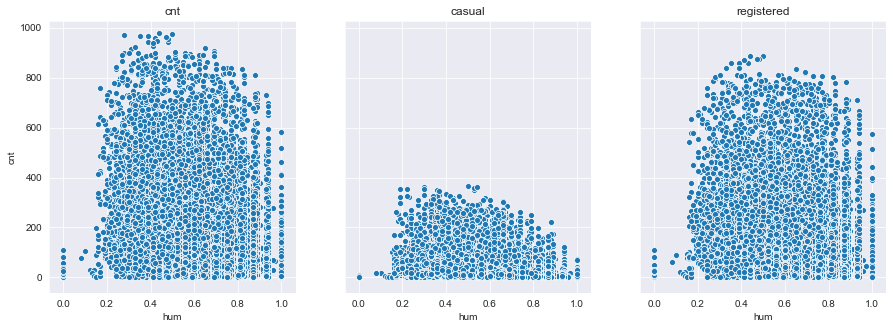

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],data=hour, x='hum', y='cnt')
axes[0].set_title('cnt')
sns.scatterplot(ax=axes[1],data=hour, x='hum', y='casual')
axes[1].set_title('casual')
sns.scatterplot(ax=axes[2],data=hour, x='hum', y='registered')
axes[2].set_title('registered')

#In general, users prefer to use the bike sharing service when hum(normalized humidity) is between 0.3 to 0.8

Text(0.5, 1.0, 'registered')

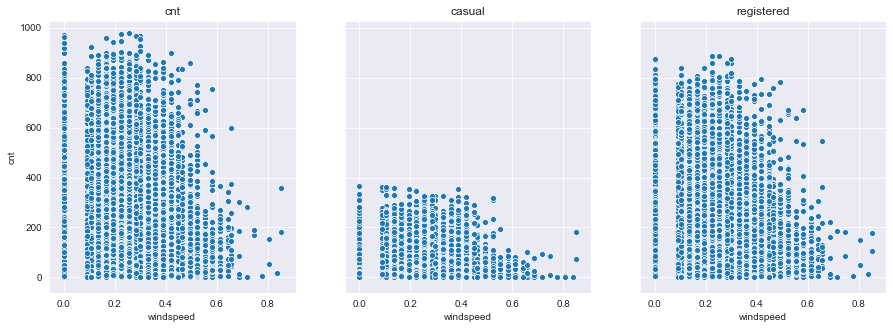

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],data=hour, x='windspeed', y='cnt')
axes[0].set_title('cnt')
sns.scatterplot(ax=axes[1],data=hour, x='windspeed', y='casual')
axes[1].set_title('casual')
sns.scatterplot(ax=axes[2],data=hour, x='windspeed', y='registered')
axes[2].set_title('registered')

#Users prefer to use the bike sharing service when windspeed is lower (0 to 0.4)

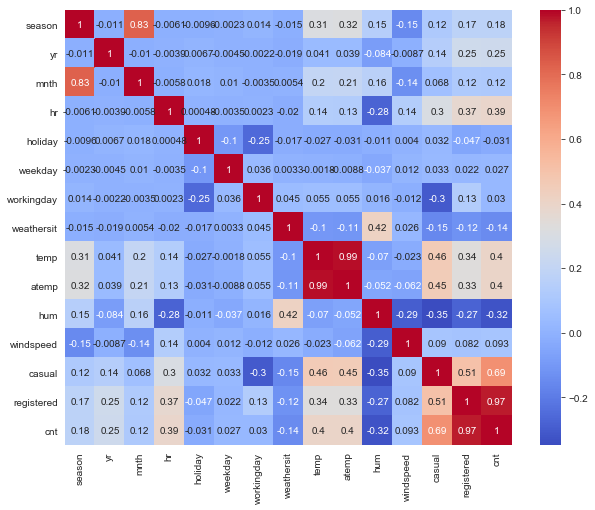

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(hour.corr(), cmap='coolwarm', annot=True)

#Season and hour have high correlation (0.83)
#Season and month have high correlation (0.83)

### For target= casual

In [58]:
#Splitting the data into training and testing
X_train, X_test, y1_train, y1_test = train_test_split(hour_x, hour_y1, test_size=0.4, random_state=9) #60% training, 40% testing

In [59]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train =pd.DataFrame(X_train, columns=["season","yr","mnth","hr","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"])

In [61]:
#Initializing the model
lr = LinearRegression()
lr.fit(X_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
#Printing the neccessary values
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': hour_x.columns, 'coefficient': lr.coef_}))
print("\n*********************************************************\n")
regressionSummary(y1_train, lr.predict(X_train))
y1_pred = lr.predict(X_train)
print("*********************************************************\n")
print('adjusted r2 : ', adjusted_r2_score(y1_train, y1_pred, lr))
print('AIC : ', AIC_score(y1_train, y1_pred, lr))
print('BIC : ', BIC_score(y1_train, y1_pred, lr))

#The adjusted R squared value = 0.45 which is very low. Hence, this is not a great model

intercept  35.779418816534
     Predictor  coefficient
0       season     2.135750
1           yr     5.288767
2         mnth    -0.383347
3           hr     7.966822
4      holiday    -2.505079
5      weekday     1.843421
6   workingday   -16.874308
7   weathersit     1.447376
8         temp     8.530917
9        atemp    12.248944
10         hum   -13.360048
11   windspeed     0.765739

*********************************************************


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 36.5316
     Mean Absolute Error (MAE) : 24.5905
*********************************************************

adjusted r2 :  0.45128755401478093
AIC :  104654.93679390431
BIC :  104756.46694815137


In [63]:
# Use predict() to make predictions on a new set
y1_test_pred = lr.predict(X_test)

result = pd.DataFrame({'Predicted': y1_test_pred, 'Actual': y1_test,
                       'Residual': y1_test - y1_test_pred})
print(result.head(20))

regressionSummary(y1_test, y1_test_pred)

       Predicted  Actual    Residual
4541   38.208496       0  -38.208496
6457   53.990010      41  -12.990010
8653   13.835905       4   -9.835905
6104   28.274945      32    3.725055
12203  94.914761     223  128.085239
8518   37.616914      28   -9.616914
10376  23.157313      64   40.842687
16526  -2.048044       9   11.048044
2421   33.811772      41    7.188228
13516  74.774873      79    4.225127
15891   7.905359       5   -2.905359
10390  16.254931       2  -14.254931
257   -50.235996       0   50.235996
6653   61.984740     116   54.015260
14602  62.361677      41  -21.361677
14434  75.900713      96   20.099287
14875  15.424384      14   -1.424384
11481  79.698438     147   67.301562
8200  -20.016272       9   29.016272
17293   5.781874      77   71.218126

Regression statistics

               Mean Error (ME) : -0.3194
Root Mean Squared Error (RMSE) : 36.1545
     Mean Absolute Error (MAE) : 24.5568


In [64]:
#Performing regularization techniques like Lasso and Ridge Regression

print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(X_train, y1_train)
regressionSummary(y1_test, lasso.predict(X_test))
print("\n********************************************************")

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(X_train, y1_train)
regressionSummary(y1_test, lasso_cv.predict(X_test))
print("\n********************************************************")

print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(X_train, y1_train)
regressionSummary(y1_test, ridge.predict(X_test))
print("\n********************************************************")

print('\n\nBayesianRidge')
bayesianRidge = BayesianRidge(normalize=True)
bayesianRidge.fit(X_train, y1_train)
regressionSummary(y1_test, bayesianRidge.predict(X_test))
print("\n********************************************************")

print('\n\nLinear Regression')
linearRegression = LinearRegression(normalize=True).fit(X_train, y1_train)
regressionSummary(y1_test, linearRegression.predict(X_test))



Lasso

Regression statistics

               Mean Error (ME) : -0.2580
Root Mean Squared Error (RMSE) : 49.2412
     Mean Absolute Error (MAE) : 34.3298

********************************************************


Lasso Cross-Validation

Regression statistics

               Mean Error (ME) : -0.3147
Root Mean Squared Error (RMSE) : 36.1462
     Mean Absolute Error (MAE) : 24.5107

********************************************************


Ridge

Regression statistics

               Mean Error (ME) : -0.2771
Root Mean Squared Error (RMSE) : 38.5452
     Mean Absolute Error (MAE) : 24.2779

********************************************************


BayesianRidge

Regression statistics

               Mean Error (ME) : -0.3190
Root Mean Squared Error (RMSE) : 36.1532
     Mean Absolute Error (MAE) : 24.5458

********************************************************


Linear Regression

Regression statistics

               Mean Error (ME) : -0.3194
Root Mean Squared Error (RMSE) : 36.15

In [65]:
print("For target= count\n")

pd.DataFrame({'features': X_train.columns, 
              'linear regression': linearRegression.coef_, 
              'lassoCV': lasso_cv.coef_, 
              'ridge': ridge.coef_, 
              'bayesianRidge': bayesianRidge.coef_})

#In Lasso regression, we can see that 'month' coefficient is 0. This shows that it is not that important

For target= count



features  linear regression    lassoCV     ridge  bayesianRidge
0       season           2.135750   1.723353  1.311439       2.127441
1           yr           5.288767   5.216877  3.093253       5.282083
2         mnth          -0.383347  -0.000000  0.340622      -0.376162
3           hr           7.966822   7.920103  5.289776       7.962920
4      holiday          -2.505079  -2.416600 -0.233230      -2.492988
5      weekday           1.843421   1.765792  0.892650       1.838913
6   workingday         -16.874308 -16.758106 -7.907084     -16.837414
7   weathersit           1.447376   1.311702 -1.271778       1.424665
8         temp           8.530917   8.755180  7.018387       8.798205
9        atemp          12.248944  11.991358  6.972235      11.961434
10         hum         -13.360048 -13.263851 -6.715746     -13.323779
11   windspeed           0.765739   0.702875  1.358999       0.764064

## For target= registered

In [66]:
X_train, X_test, y2_train, y2_test = train_test_split(hour_x, hour_y2, test_size=0.4, random_state=9) #60% training, 40% testing

In [67]:
lr = LinearRegression()
lr.fit(X_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': hour_x.columns, 'coefficient': lr.coef_}))
print("\n*********************************************************\n")
regressionSummary(y2_train, lr.predict(X_train))
y2_pred = lr.predict(X_train)
print("*********************************************************\n")
print('adjusted r2 : ', adjusted_r2_score(y2_train, y2_pred, lr))
print('AIC : ', AIC_score(y2_train, y2_pred, lr))
print('BIC : ', BIC_score(y2_train, y2_pred, lr))

intercept  -47.72167960951376
     Predictor  coefficient
0       season    19.105118
1           yr    73.822322
2         mnth    -0.051911
3           hr     6.381137
4      holiday   -17.093923
5      weekday     1.200914
6   workingday    39.353959
7   weathersit    -5.343654
8         temp    61.339052
9        atemp   133.106449
10         hum  -127.072928
11   windspeed    44.018822

*********************************************************


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 125.4076
     Mean Absolute Error (MAE) : 90.6170
*********************************************************

adjusted r2 :  0.3337167145191887
AIC :  130376.09203764357
BIC :  130477.62219189062


In [69]:
y2_test_pred = lr.predict(X_test)

result = pd.DataFrame({'Predicted': y2_test_pred, 'Actual': y2_test,
                       'Residual': y2_test - y2_test_pred})
print(result.head(20))

regressionSummary(y2_test, y2_test_pred)

        Predicted  Actual    Residual
4541   136.966989       4 -132.966989
6457   124.903042     154   29.096958
8653    37.152097      10  -27.152097
6104   200.294447     135  -65.294447
12203  243.380397     278   34.619603
8518    75.910865      69   -6.910865
10376  173.074705     155  -18.074705
16526  158.655733     629  470.344267
2421    96.553227     168   71.446773
13516  165.284732     179   13.715268
15891  223.026879      76 -147.026879
10390  111.381887      25  -86.381887
257    -52.911045       1   53.911045
6653   160.194712     186   25.805288
14602  286.563326     204  -82.563326
14434  311.410957     242  -69.410957
14875  140.677851      31 -109.677851
11481  193.839402     293   99.160598
8200    74.979652     391  316.020348
17293  131.285322      85  -46.285322

Regression statistics

               Mean Error (ME) : -3.9303
Root Mean Squared Error (RMSE) : 120.3659
     Mean Absolute Error (MAE) : 88.2485


In [70]:
#Performing regularization techniques like Lasso and Ridge Regression

print('\n\nLasso')
lasso_2 = Lasso(normalize=True, alpha=1)
lasso_2.fit(X_train, y2_train)
regressionSummary(y2_test, lasso_2.predict(X_test))
print("\n********************************************************")

print('\n\nLasso Cross-Validation')
lasso_cv_2 = LassoCV(normalize=True, cv=100)
lasso_cv_2.fit(X_train, y2_train)
regressionSummary(y2_test, lasso_cv_2.predict(X_test))
print("\n********************************************************")

print('\n\nRidge')
ridge_2 = Ridge(normalize=True, alpha=1)
ridge_2.fit(X_train, y2_train)
regressionSummary(y2_test, ridge_2.predict(X_test))
print("\n********************************************************")

print('\n\nBayesianRidge')
bayesianRidge_2 = BayesianRidge(normalize=True)
bayesianRidge_2.fit(X_train, y2_train)
regressionSummary(y2_test, bayesianRidge_2.predict(X_test))
print("\n********************************************************")

print('\n\nLinear Regression')
linearRegression_2 = LinearRegression(normalize=True).fit(X_train, y2_train)
regressionSummary(y2_test, linearRegression_2.predict(X_test))



Lasso

Regression statistics

               Mean Error (ME) : -3.1372
Root Mean Squared Error (RMSE) : 147.7371
     Mean Absolute Error (MAE) : 112.9526

********************************************************


Lasso Cross-Validation

Regression statistics

               Mean Error (ME) : -3.9256
Root Mean Squared Error (RMSE) : 120.3576
     Mean Absolute Error (MAE) : 88.2123

********************************************************


Ridge

Regression statistics

               Mean Error (ME) : -3.5001
Root Mean Squared Error (RMSE) : 124.6241
     Mean Absolute Error (MAE) : 90.7364

********************************************************


BayesianRidge

Regression statistics

               Mean Error (ME) : -3.9260
Root Mean Squared Error (RMSE) : 120.3660
     Mean Absolute Error (MAE) : 88.2275

********************************************************


Linear Regression

Regression statistics

               Mean Error (ME) : -3.9303
Root Mean Squared Error (RMSE) : 

In [71]:
print("For target= registered\n")

pd.DataFrame({'features': X_train.columns, 
              'linear regression': linearRegression_2.coef_, 
              'lassoCV': lasso_cv_2.coef_, 
              'ridge': ridge_2.coef_, 
              'bayesianRidge': bayesianRidge_2.coef_})

For target= registered



features  linear regression     lassoCV      ridge  bayesianRidge
0       season          19.105118   18.870774   7.917229      18.901356
1           yr          73.822322   73.609374  37.794700      73.580828
2         mnth          -0.051911    0.000000   1.414694       0.000091
3           hr           6.381137    6.368955   3.456040       6.362431
4      holiday         -17.093923  -16.666171 -15.807446     -17.190401
5      weekday           1.200914    1.150781   0.648431       1.192789
6   workingday          39.353959   39.173104  20.152444      39.217010
7   weathersit          -5.343654   -5.192933  -6.854729      -5.381922
8         temp          61.339052   63.223921  72.923685      68.040426
9        atemp         133.106449  130.813526  80.931981     125.610738
10         hum        -127.072928 -127.031264 -80.174815    -126.774146
11   windspeed          44.018822   42.969460  35.955871      43.654835

## For target=cnt

In [72]:
X_train, X_test, y3_train, y3_test = train_test_split(hour_x, hour_y3, test_size=0.4, random_state=9) #60% training, 40% testing

In [73]:
lr = LinearRegression()
lr.fit(X_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': hour_x.columns, 'coefficient': lr.coef_}))
print("\n*********************************************************\n")
regressionSummary(y3_train, lr.predict(X_train))
y3_pred = lr.predict(X_train)
print("*********************************************************\n")
print('adjusted r2 : ', adjusted_r2_score(y3_train, y3_pred, lr))
print('AIC : ', AIC_score(y3_train, y3_pred, lr))
print('BIC : ', BIC_score(y3_train, y3_pred, lr))

intercept  -29.095953261203192
     Predictor  coefficient
0       season    21.033904
1           yr    84.400026
2         mnth    -0.163404
3           hr     7.536912
4      holiday   -32.031485
5      weekday     2.119745
6   workingday     3.099789
7   weathersit    -3.084996
8         temp   105.614197
9        atemp   204.308895
10         hum  -196.357421
11   windspeed    50.328805

*********************************************************


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 143.6847
            Mean Absolute Error (MAE) : 107.3616
          Mean Percentage Error (MPE) : -228.7092
Mean Absolute Percentage Error (MAPE) : 335.3326
*********************************************************

adjusted r2 :  0.38583992864762895
AIC :  133213.31205684747
BIC :  133314.8422110945


In [75]:
y3_test_pred = lr.predict(X_test)

result = pd.DataFrame({'Predicted': y3_test_pred, 'Actual': y3_test,
                       'Residual': y3_test - y3_test_pred})
print(result.head(20))

regressionSummary(y3_test, y3_test_pred)

        Predicted  Actual    Residual
4541   175.175485       4 -171.175485
6457   178.893052     195   16.106948
8653    50.988002      14  -36.988002
6104   228.569392     167  -61.569392
12203  338.295158     501  162.704842
8518   113.527780      97  -16.527780
10376  196.232018     219   22.767982
16526  156.607689     638  481.392311
2421   130.364999     209   78.635001
13516  240.059604     258   17.940396
15891  230.932238      81 -149.932238
10390  127.636818      27 -100.636818
257   -103.147041       1  104.147041
6653   222.179452     302   79.820548
14602  348.925003     245 -103.925003
14434  387.311671     338  -49.311671
14875  156.102236      45 -111.102236
11481  273.537840     440  166.462160
8200    54.963380     400  345.036620
17293  137.067196     162   24.932804

Regression statistics

                      Mean Error (ME) : -4.2498
       Root Mean Squared Error (RMSE) : 139.0270
            Mean Absolute Error (MAE) : 105.2244
          Mean Percentage Error 

In [76]:
#Performing regularization techniques like Lasso and Ridge Regression

print('\n\nLasso')
lasso_3 = Lasso(normalize=True, alpha=1)
lasso_3.fit(X_train, y3_train)
regressionSummary(y3_test, lasso.predict(X_test))
print("\n********************************************************")

print('\n\nLasso Cross-Validation')
lasso_cv_3 = LassoCV(normalize=True, cv=100)
lasso_cv_3.fit(X_train, y3_train)
regressionSummary(y3_test, lasso_cv.predict(X_test))
print("\n********************************************************")

print('\n\nRidge')
ridge_3 = Ridge(normalize=True, alpha=1)
ridge_3.fit(X_train, y3_train)
regressionSummary(y3_test, ridge.predict(X_test))
print("\n********************************************************")

print('\n\nBayesianRidge')
bayesianRidge_3 = BayesianRidge(normalize=True)
bayesianRidge_3.fit(X_train, y3_train)
regressionSummary(y3_test, bayesianRidge.predict(X_test))
print("\n********************************************************")

print('\n\nLinear Regression')
linearRegression_3 = LinearRegression(normalize=True).fit(X_train, y3_train)
regressionSummary(y3_test, linearRegression_3.predict(X_test))



Lasso

Regression statistics

                      Mean Error (ME) : 151.6466
       Root Mean Squared Error (RMSE) : 234.0032
            Mean Absolute Error (MAE) : 161.9354
          Mean Percentage Error (MPE) : -59.3125
Mean Absolute Percentage Error (MAPE) : 173.0520

********************************************************


Lasso Cross-Validation

Regression statistics

                      Mean Error (ME) : 55.8087
       Root Mean Squared Error (RMSE) : 170.7542
            Mean Absolute Error (MAE) : 116.3597
          Mean Percentage Error (MPE) : -227.2576
Mean Absolute Percentage Error (MAPE) : 273.6674

********************************************************


Ridge

Regression statistics

                      Mean Error (ME) : 85.2526
       Root Mean Squared Error (RMSE) : 185.4435
            Mean Absolute Error (MAE) : 123.4685
          Mean Percentage Error (MPE) : -181.4270
Mean Absolute Percentage Error (MAPE) : 241.6626

***********************************

In [77]:
print("For target= count\n")

pd.DataFrame({'features': X_train.columns, 
              'linear regression': linearRegression_3.coef_, 
              'lassoCV': lasso_cv_3.coef_, 
              'ridge': ridge_3.coef_, 
              'bayesianRidge': bayesianRidge_3.coef_})

For target= count



features  linear regression     lassoCV       ridge  bayesianRidge
0       season          21.033904   20.447991    9.101583      20.845827
1           yr          84.400026   84.054072   43.981305      84.170760
2         mnth          -0.163404   -0.000000    1.513762      -0.115124
3           hr           7.536912    7.516331    4.223447       7.519857
4      holiday         -32.031485  -31.382486  -17.198178     -32.007684
5      weekday           2.119745    2.037059    1.093361       2.109322
6   workingday           3.099789    2.812058    3.164206       3.099561
7   weathersit          -3.084996   -2.838010   -8.839361      -3.171156
8         temp         105.614197  108.250086  109.348853     113.530808
9        atemp         204.308895  201.156227  121.461206     195.275200
10         hum        -196.357421 -196.361572 -115.002314    -195.817290
11   windspeed          50.328805   48.658710   47.154541      49.990507